# Weather Prediction and Analysis using Pyspark

###### ==================================================================================================================

### Testing Spark Installation

In [1]:
import pyspark
from pyspark.sql import SparkSession

In [2]:
spark=SparkSession.builder.appName('Weather Prediction').getOrCreate()

In [3]:
spark

### Loading Dataset

In [4]:
df=spark.read.csv('./train.csv',inferSchema=True,header=True)
df.show(10)

+------------+-------------+--------------+----------------+---------------+--------------+---------------------+-------------------+-------------------+-----------------+------------------+-------------------+------------------------+------------------+-----------------+-----------------+------------------+------------------+------------------+------------------+--------------+-----------+------------------+-------------+-------------+-------------+-----------+------------+------------------+------------+--------------------+------------+--------------------+-------------------+-------------------+-------------------+------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+---------------+----------------+--------------+------------------+----------------+-----------------+------------------+-----------------+-----------+-------------+-------------+----------------

### Data Analysis

In [5]:
df.printSchema()

root
 |-- fact_time: double (nullable = true)
 |-- fact_latitude: double (nullable = true)
 |-- fact_longitude: double (nullable = true)
 |-- fact_temperature: double (nullable = true)
 |-- fact_cwsm_class: double (nullable = true)
 |-- climate: string (nullable = true)
 |-- topography_bathymetry: double (nullable = true)
 |-- sun_elevation: double (nullable = true)
 |-- climate_temperature: double (nullable = true)
 |-- climate_pressure: double (nullable = true)
 |-- cmc_0_0_0_1000: double (nullable = true)
 |-- cmc_0_0_0_2_grad: double (nullable = true)
 |-- cmc_0_0_0_2_interpolated: double (nullable = true)
 |-- cmc_0_0_0_2_next: double (nullable = true)
 |-- cmc_0_0_0_2: double (nullable = true)
 |-- cmc_0_0_0_500: double (nullable = true)
 |-- cmc_0_0_0_700: double (nullable = true)
 |-- cmc_0_0_0_850: double (nullable = true)
 |-- cmc_0_0_0_925: double (nullable = true)
 |-- cmc_0_0_6_2: double (nullable = true)
 |-- cmc_0_0_7_1000: double (nullable = true)
 |-- cmc_0_0_7_2: doub

In [6]:
df.columns

['fact_time',
 'fact_latitude',
 'fact_longitude',
 'fact_temperature',
 'fact_cwsm_class',
 'climate',
 'topography_bathymetry',
 'sun_elevation',
 'climate_temperature',
 'climate_pressure',
 'cmc_0_0_0_1000',
 'cmc_0_0_0_2_grad',
 'cmc_0_0_0_2_interpolated',
 'cmc_0_0_0_2_next',
 'cmc_0_0_0_2',
 'cmc_0_0_0_500',
 'cmc_0_0_0_700',
 'cmc_0_0_0_850',
 'cmc_0_0_0_925',
 'cmc_0_0_6_2',
 'cmc_0_0_7_1000',
 'cmc_0_0_7_2',
 'cmc_0_0_7_500',
 'cmc_0_0_7_700',
 'cmc_0_0_7_850',
 'cmc_0_0_7_925',
 'cmc_0_1_0_0',
 'cmc_0_1_11_0',
 'cmc_0_1_65_0',
 'cmc_0_1_66_0',
 'cmc_0_1_67_0',
 'cmc_0_1_68_0',
 'cmc_0_1_7_0',
 'cmc_0_2_2_10',
 'cmc_0_2_2_1000',
 'cmc_0_2_2_500',
 'cmc_0_2_2_700',
 'cmc_0_2_2_850',
 'cmc_0_2_2_925',
 'cmc_0_2_3_10',
 'cmc_0_2_3_1000',
 'cmc_0_2_3_500',
 'cmc_0_2_3_700',
 'cmc_0_2_3_850',
 'cmc_0_2_3_925',
 'cmc_0_3_0_0',
 'cmc_0_3_0_0_next',
 'cmc_0_3_1_0',
 'cmc_0_3_5_1000',
 'cmc_0_3_5_500',
 'cmc_0_3_5_700',
 'cmc_0_3_5_850',
 'cmc_0_3_5_925',
 'cmc_0_6_1_0',
 'cmc_availab

In [7]:
df.count()

3129592

In [7]:
import pandas as pd
pd.DataFrame(df.dtypes, columns = ['Column Name','Data type'])

,Column Name,Data type
0,fact_time,double
1,fact_latitude,double
2,fact_longitude,double
3,fact_temperature,double
4,fact_cwsm_class,double
...,...,...
124,cmc_0_1_68_0_next,double
125,gfs_2m_dewpoint_grad,double
126,gfs_2m_dewpoint_next,double
127,gfs_total_clouds_cover_low_grad,double


In [8]:
df.head(5)

[Row(fact_time=1543320900.0, fact_latitude=26.9688, fact_longitude=-99.248901, fact_temperature=2.0, fact_cwsm_class=0.0, climate='dry', topography_bathymetry=127.0, sun_elevation=-17.526443119551416, climate_temperature=14.613571428571456, climate_pressure=754.2634045770649, cmc_0_0_0_1000=282.702880859375, cmc_0_0_0_2_grad=6.684790039062477, cmc_0_0_0_2_interpolated=276.300439453125, cmc_0_0_0_2_next=282.9852294921875, cmc_0_0_0_2=276.300439453125, cmc_0_0_0_500=262.3337890625, cmc_0_0_0_700=276.96213378906253, cmc_0_0_0_850=280.083056640625, cmc_0_0_0_925=281.141064453125, cmc_0_0_6_2=272.5009460449219, cmc_0_0_7_1000=14.25, cmc_0_0_7_2=3.75, cmc_0_0_7_500=29.9055153131485, cmc_0_0_7_700=15.5, cmc_0_0_7_850=29.75, cmc_0_0_7_925=15.75, cmc_0_1_0_0=0.0034, cmc_0_1_11_0=0.0, cmc_0_1_65_0=0.0, cmc_0_1_66_0=0.0, cmc_0_1_67_0=0.0, cmc_0_1_68_0=0.0, cmc_0_1_7_0=0.0, cmc_0_2_2_10=-1.3275482177734377, cmc_0_2_2_1000=-2.914091491699219, cmc_0_2_2_500=18.35760803222656, cmc_0_2_2_700=8.4806610

In [9]:
df.describe(['climate_temperature']).show()

+-------+-------------------+
|summary|climate_temperature|
+-------+-------------------+
|  count|            3129592|
|   mean| 15.053651434869733|
| stddev|   9.02109937129866|
|    min|  -27.2135714285714|
|    max|  45.99285714285718|
+-------+-------------------+



### Removing the unneccesary columns

In [10]:
data=df['fact_time','fact_latitude','fact_longitude','fact_temperature','climate','climate_temperature','gfs_total_clouds_cover_low_grad']

In [11]:
print(data)

DataFrame[fact_time: double, fact_latitude: double, fact_longitude: double, fact_temperature: double, climate: string, climate_temperature: double, gfs_total_clouds_cover_low_grad: double]


In [12]:
data.columns

['fact_time',
 'fact_latitude',
 'fact_longitude',
 'fact_temperature',
 'climate',
 'climate_temperature',
 'gfs_total_clouds_cover_low_grad']

In [13]:
data.head(5)

[Row(fact_time=1543320900.0, fact_latitude=26.9688, fact_longitude=-99.248901, fact_temperature=2.0, climate='dry', climate_temperature=14.613571428571456, gfs_total_clouds_cover_low_grad=0.0),
 Row(fact_time=1538776380.0, fact_latitude=29.374201, fact_longitude=-100.927002, fact_temperature=31.0, climate='mild temperate', climate_temperature=26.992142857142888, gfs_total_clouds_cover_low_grad=-12.0),
 Row(fact_time=1552114800.0, fact_latitude=22.149599, fact_longitude=113.592003, fact_temperature=17.0, climate='mild temperate', climate_temperature=18.84214285714289, gfs_total_clouds_cover_low_grad=1.0),
 Row(fact_time=1549565880.0, fact_latitude=34.678699, fact_longitude=-86.684799, fact_temperature=24.0, climate='mild temperate', climate_temperature=8.303571428571448, gfs_total_clouds_cover_low_grad=-58.0),
 Row(fact_time=1552910400.0, fact_latitude=46.066667, fact_longitude=41.966667, fact_temperature=9.0, climate='dry', climate_temperature=6.451428571428595, gfs_total_clouds_cover_

In [14]:
import pandas as pd
pd.DataFrame(data.dtypes, columns = ['Column Name','Data type'])

,Column Name,Data type
0,fact_time,double
1,fact_latitude,double
2,fact_longitude,double
3,fact_temperature,double
4,climate,string
5,climate_temperature,double
6,gfs_total_clouds_cover_low_grad,double


### Data Preprocessing

<AxesSubplot:>

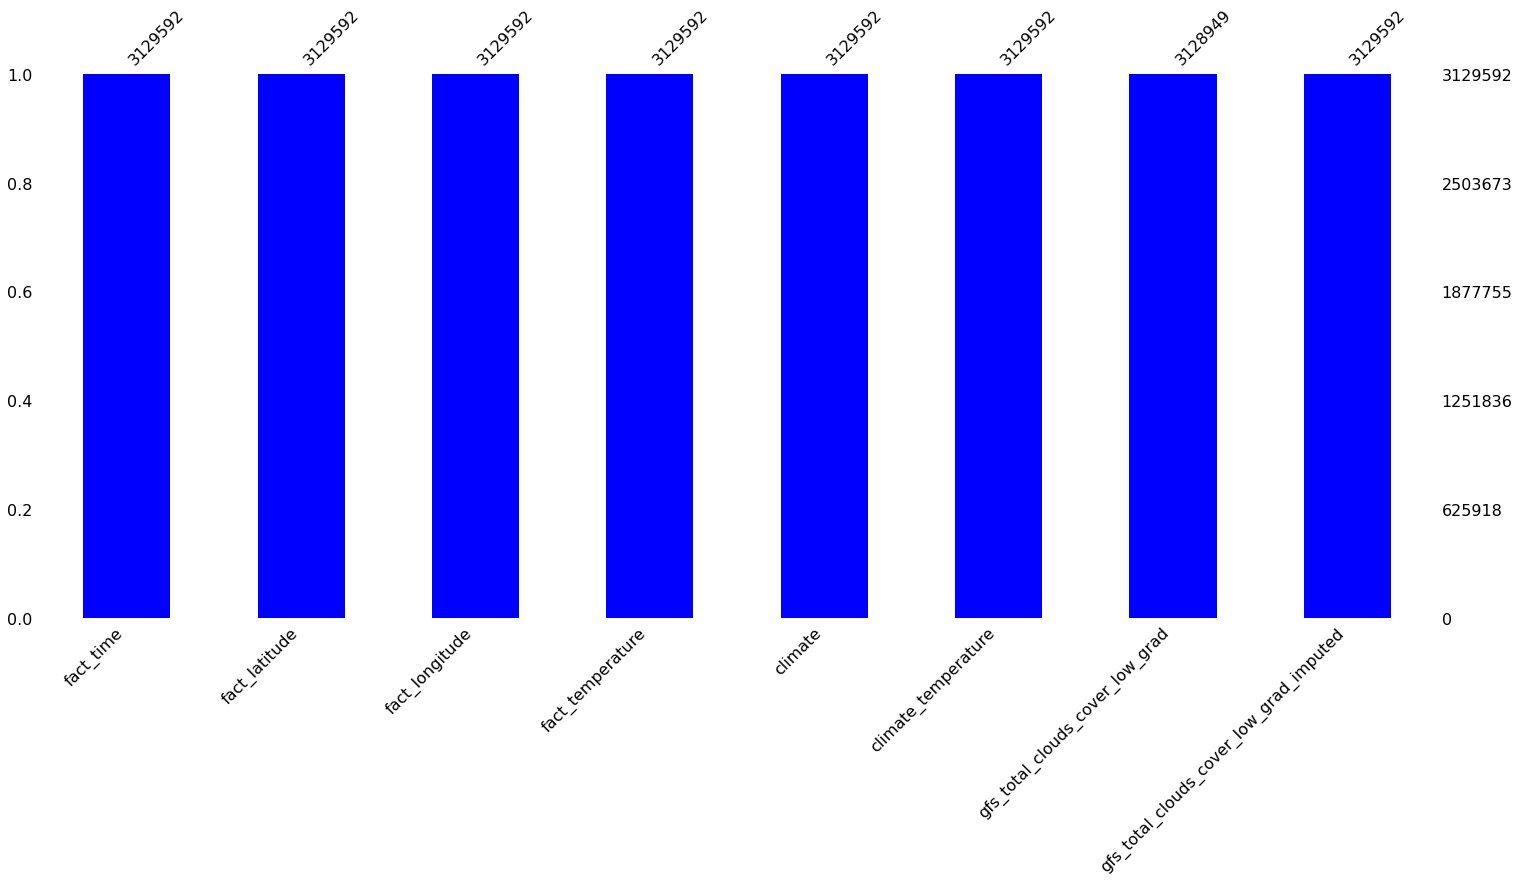

In [151]:
import missingno as msno
msno.bar(data.toPandas(),color="blue")

### Checking missing Values

In [15]:
from pyspark.sql.functions import col,isnan, when, count
data.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in data.columns]).show()

+---------+-------------+--------------+----------------+-------+-------------------+-------------------------------+
|fact_time|fact_latitude|fact_longitude|fact_temperature|climate|climate_temperature|gfs_total_clouds_cover_low_grad|
+---------+-------------+--------------+----------------+-------+-------------------+-------------------------------+
|        0|            0|             0|               0|      0|                  0|                            643|
+---------+-------------+--------------+----------------+-------+-------------------+-------------------------------+



### Replacing Missing values with mean

In [18]:
from pyspark.ml.feature import Imputer
imputer=Imputer(inputCols=['gfs_total_clouds_cover_low_grad'],
                outputCols=["{}_imputed".format(c) for c in ['gfs_total_clouds_cover_low_grad']]
               ).setStrategy("mean")

In [19]:
imputer=imputer.fit(data)

In [20]:
data = imputer.transform(data)

In [21]:
data.show(5)

+------------+-------------+--------------+----------------+--------------+-------------------+-------------------------------+---------------------------------------+
|   fact_time|fact_latitude|fact_longitude|fact_temperature|       climate|climate_temperature|gfs_total_clouds_cover_low_grad|gfs_total_clouds_cover_low_grad_imputed|
+------------+-------------+--------------+----------------+--------------+-------------------+-------------------------------+---------------------------------------+
| 1.5433209E9|      26.9688|    -99.248901|             2.0|           dry| 14.613571428571456|                            0.0|                                    0.0|
|1.53877638E9|    29.374201|   -100.927002|            31.0|mild temperate| 26.992142857142888|                          -12.0|                                  -12.0|
| 1.5521148E9|    22.149599|    113.592003|            17.0|mild temperate|  18.84214285714289|                            1.0|                                 

### Featuring

In [22]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
assembler=VectorAssembler(inputCols=['fact_time','fact_latitude','fact_longitude','fact_temperature'],outputCol='features')
output=assembler.transform(data)
output.select('features','climate_temperature').show(5)

+--------------------+-------------------+
|            features|climate_temperature|
+--------------------+-------------------+
|[1.5433209E9,26.9...| 14.613571428571456|
|[1.53877638E9,29....| 26.992142857142888|
|[1.5521148E9,22.1...|  18.84214285714289|
|[1.54956588E9,34....|  8.303571428571448|
|[1.5529104E9,46.0...|  6.451428571428595|
+--------------------+-------------------+
only showing top 5 rows



In [23]:
output.select("features").show()

+--------------------+
|            features|
+--------------------+
|[1.5433209E9,26.9...|
|[1.53877638E9,29....|
|[1.5521148E9,22.1...|
|[1.54956588E9,34....|
|[1.5529104E9,46.0...|
|[1.5522336E9,35.2...|
|[1.5415194E9,39.6...|
|[1.5486642E9,-16....|
|[1.5536241E9,32.9...|
|[1.5409368E9,37.3...|
|[1.549422E9,25.63...|
|[1.55016672E9,47....|
|[1.55411958E9,33....|
|[1.541286E9,-36.9...|
|[1.5451641E9,35.3...|
|[1.5497253E9,37.2...|
|[1.5395004E9,36.5...|
|[1.54575318E9,36....|
|[1.5476589E9,31.2...|
|[1.5541092E9,18.3...|
+--------------------+
only showing top 20 rows



In [24]:
finalized_data=output.select("features","climate_temperature")
finalized_data.show(10)

+--------------------+-------------------+
|            features|climate_temperature|
+--------------------+-------------------+
|[1.5433209E9,26.9...| 14.613571428571456|
|[1.53877638E9,29....| 26.992142857142888|
|[1.5521148E9,22.1...|  18.84214285714289|
|[1.54956588E9,34....|  8.303571428571448|
|[1.5529104E9,46.0...|  6.451428571428595|
|[1.5522336E9,35.2...|  9.241428571428605|
|[1.5415194E9,39.6...|  17.98214285714289|
|[1.5486642E9,-16....|  29.15571428571431|
|[1.5536241E9,32.9...|   19.5514285714286|
|[1.5409368E9,37.3...| 15.587857142857173|
+--------------------+-------------------+
only showing top 10 rows



### Splitting the data into testing and training

In [25]:
train_data,test_data=finalized_data.randomSplit([0.75,0.25])

### Linear Regression

In [26]:
from pyspark.ml.regression import LinearRegression
lr=LinearRegression(featuresCol='features',labelCol='climate_temperature')
trained_model=lr.fit(train_data)
lr_results=trained_model.evaluate(train_data)
print("Coefficients: %s" % str(trained_model.coefficients))
print("Intercept: %s" % str(trained_model.intercept))

Coefficients: [-1.433342590316359e-07,-0.05012226174026397,-0.002782644793631341,0.6943882874163623]
Intercept: 227.41470172281447


In [27]:
trainingSummary = trained_model.summary
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("Accuray: %f" % trainingSummary.r2)

RMSE: 4.233810
Accuray: 0.779736


### Predicted Values

In [28]:
pred_results=trained_model.evaluate(test_data)

In [29]:
pred_results.predictions.show()

+--------------------+-------------------+------------------+
|            features|climate_temperature|        prediction|
+--------------------+-------------------+------------------+
|[1.53576E9,3.7552...|   24.5164285714286| 23.74054307016948|
|[1.53576E9,5.0154...| 21.575000000000024|23.682273027414965|
|[1.53576E9,19.466...|  18.47571428571432| 20.60713729742605|
|[1.53576E9,40.063...| 25.785000000000032|20.408658933108597|
|[1.53576012E9,62....|  10.72714285714289|12.964121112075532|
|[1.53576054E9,35....| 23.309285714285743|24.552617266830794|
|[1.53576336E9,31....|  27.08928571428575|23.969899090382086|
|[1.5357636E9,-25....|   14.1014285714286|16.842211337309266|
|[1.5357654E9,44.8...|  20.69214285714289|19.566147468836334|
|[1.53577068E9,40....|  28.82714285714289|18.033118814347972|
|[1.5357708E9,-49....|  6.910714285714319|14.112848863189896|
|[1.53577398E9,36....| 24.721428571428607| 16.89665271150116|
|[1.535778E9,-0.15...| 23.635000000000023|25.736705323937883|
|[1.5357

### Visualization

In [149]:
dataplot=data.groupby("climate").sum("climate_temperature")
x=dataplot.toPandas()["climate"].values.tolist()
y=dataplot.toPandas()["sum(climate_temperature)"].values.tolist()

<function matplotlib.pyplot.show(close=None, block=None)>

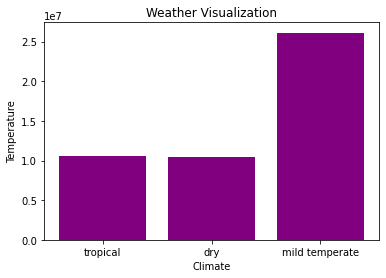

In [155]:
import matplotlib.pyplot as plt
import pandas
plt.bar(x,y,color="purple")
plt.title("Weather Visualization")
plt.xlabel("Climate")
plt.ylabel("Temperature")
plt.show

In [157]:
dataplot=data.groupby("fact_temperature").sum("climate_temperature")
a=dataplot.toPandas()["fact_temperature"].values.tolist()
b=dataplot.toPandas()["sum(climate_temperature)"].values.tolist()

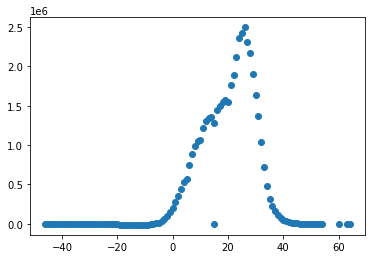

In [159]:
plt.scatter(a,b)

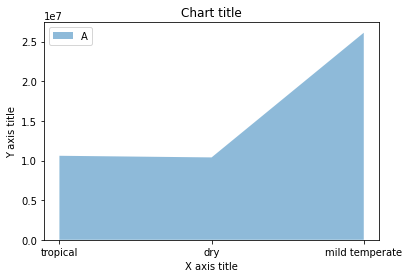

In [170]:
ax = plt.gca()
ax.stackplot(x, y, labels=['A','B','C'],alpha=0.5)
#Adding the aesthetics
plt.legend(loc='upper left')
plt.title('Chart title')
plt.xlabel('X axis title')
plt.ylabel('Y axis title') 
#Show the plot
plt.show()